# World Population (EDA)

The folllowing is the list of possible EDA steps to prepare data for training a ML model. In this notebook, I address some of them.

## Steps to do:
1. Imports
2. Load data
3. Know/understand data
  
  3.1. df.shape

  3.2. df.head(), df.tail(), df.sample(5)

  3.3. df.info()

  3.4. df.describe(),

  3.5. df.select_dtype(include/exclude="number"/"categorical")

  3.6. Feature analysis: Correlation, Mutual Information, Statistical tests.

4. Remove duplicates
5. Null handling
6. Skewness handling for numerical data
7. Outlier Handling
8. Filter data for analysis
9. Scale the numeric data
10. Encode the categorical data
11. Feature engineering
  
  11.1. Dimensionality reduction (PCA, tSNE, UMAP)
  
  11.2. Manual Featuring

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/AlexTheAnalyst/PandasYouTubeSeries/main/world_population.csv')

In [5]:
df.shape

(234, 17)

In [6]:
df.head(5)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00


In [7]:
df.describe().T # transpose

,count,mean,std,min,25%,50%,75%,max
Rank,234.0,1.175000e+02,6.769417e+01,1.0000,59.250000,1.175000e+02,1.757500e+02,2.340000e+02
2022 Population,230.0,3.463225e+07,1.378892e+08,510.0000,419738.500000,5.762857e+06,2.265372e+07,1.425887e+09
2020 Population,233.0,3.360071e+07,1.358732e+08,520.0000,406471.000000,5.456681e+06,2.152263e+07,1.424930e+09
2015 Population,230.0,3.206600e+07,1.315071e+08,564.0000,394295.000000,5.244415e+06,1.973085e+07,1.393715e+09
2010 Population,227.0,3.027016e+07,1.260742e+08,596.0000,382726.500000,4.889741e+06,1.682585e+07,1.348191e+09
2000 Population,227.0,2.684050e+07,1.133525e+08,651.0000,329470.000000,4.491202e+06,1.562547e+07,1.264099e+09
1990 Population,229.0,1.933046e+07,8.130962e+07,700.0000,261928.000000,3.785847e+06,1.188276e+07,1.153704e+09
1980 Population,229.0,1.628288e+07,6.934547e+07,733.0000,223752.000000,3.135123e+06,9.817257e+06,9.823725e+08
1970 Population,230.0,1.586650e+07,6.835586e+07,752.0000,145880.500000,2.511718e+06,8.817329e+06,8.225344e+08
Area (km²),232.0,5.816637e+05,1.769133e+06,1.0000,2567.250000,7.714100e+04,4.146432e+05,1.709824e+07


In [8]:
df.sort_values(by="World Population Percentage", ascending=False).head(10)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,982372466.0,822534450.0,9706961.0,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1.417173e+09,1.396387e+09,1.322867e+09,1.240614e+09,1.059634e+09,NaN,NaN,557501301.0,3287590.0,431.0675,1.0068,17.77
221,3,USA,United States,"Washington, D.C.",North America,3.382899e+08,3.359420e+08,3.246078e+08,3.111828e+08,2.823986e+08,2.480837e+08,223140018.0,200328340.0,9372610.0,36.0935,1.0038,4.24
93,4,IDN,Indonesia,Jakarta,Asia,2.755013e+08,2.718580e+08,2.590920e+08,2.440162e+08,2.140724e+08,1.821599e+08,148177096.0,115228394.0,1904569.0,144.6529,1.0064,3.45
156,5,PAK,Pakistan,Islamabad,Asia,2.358249e+08,2.271967e+08,2.109693e+08,1.944545e+08,1.543699e+08,1.154141e+08,80624057.0,59290872.0,881912.0,267.4018,1.0191,2.96
149,6,NGA,Nigeria,Abuja,Africa,2.185412e+08,2.083274e+08,1.839958e+08,1.609529e+08,1.228520e+08,9.521426e+07,72951439.0,55569264.0,923768.0,236.5759,1.0241,2.74
27,7,BRA,Brazil,Brasilia,South America,2.153135e+08,2.131963e+08,2.051882e+08,1.963535e+08,1.758737e+08,1.507064e+08,122288383.0,96369875.0,8515767.0,25.2841,1.0046,2.70
16,8,BGD,Bangladesh,Dhaka,Asia,1.711864e+08,1.674210e+08,1.578300e+08,1.483911e+08,1.291933e+08,1.071477e+08,83929765.0,67541860.0,147570.0,1160.0350,1.0108,2.15
171,9,RUS,Russia,Moscow,Europe,1.447133e+08,1.456173e+08,1.446684e+08,1.432426e+08,1.468448e+08,1.480057e+08,138257420.0,130093010.0,17098242.0,8.4636,0.9973,1.81
131,10,MEX,Mexico,Mexico City,North America,1.275041e+08,1.259983e+08,1.201499e+08,1.125324e+08,9.787344e+07,8.172043e+07,67705186.0,50289306.0,1964375.0,64.9082,1.0063,1.60


In [9]:
# Identify columns with non-numerical data
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Drop or encode non-numerical columns before imputation
df_numeric = df.drop(non_numeric_cols, axis=1)
df_cat = df.drop(numeric_cols, axis=1)

In [10]:
df[numeric_cols].corr()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,1.000000,-0.357989,-0.356283,-0.352850,-0.350009,-0.342095,-0.333014,-0.328620,-0.335737,-0.384854,0.128994,-0.220197,-0.358464
2022 Population,-0.357989,1.000000,0.999946,0.999492,0.998633,0.994602,0.991124,0.986675,0.973135,0.452812,-0.028761,-0.022059,0.999999
2020 Population,-0.356283,0.999946,1.000000,0.999764,0.999108,0.995582,0.992557,0.988392,0.975245,0.454902,-0.027802,-0.025976,0.999944
2015 Population,-0.352850,0.999492,0.999764,1.000000,0.999784,0.997343,0.994968,0.991346,0.979413,0.458101,-0.027740,-0.031150,0.999489
2010 Population,-0.350009,0.998633,0.999108,0.999784,1.000000,0.998595,0.996716,0.993628,0.983050,0.461498,-0.026635,-0.038262,0.998630
2000 Population,-0.342095,0.994602,0.995582,0.997343,0.998595,1.000000,0.999192,0.997247,0.990959,0.473137,-0.026341,-0.052041,0.994598
1990 Population,-0.333014,0.991124,0.992557,0.994968,0.996716,0.999192,1.000000,0.999257,0.997158,0.524392,-0.032348,-0.066718,0.991102
1980 Population,-0.328620,0.986675,0.988392,0.991346,0.993628,0.997247,0.999257,1.000000,0.999251,0.530726,-0.032167,-0.077794,0.986652
1970 Population,-0.335737,0.973135,0.975245,0.979413,0.983050,0.990959,0.997158,0.999251,1.000000,0.509942,-0.027523,-0.080020,0.973143
Area (km²),-0.384854,0.452812,0.454902,0.458101,0.461498,0.473137,0.524392,0.530726,0.509942,1.000000,-0.063545,-0.012829,0.453305


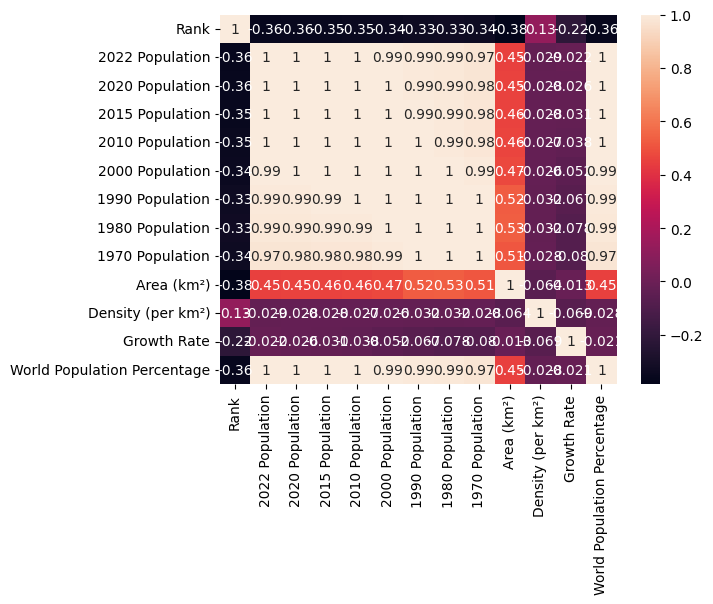

In [11]:
sns.heatmap(df[numeric_cols].corr(), annot = True)
plt.rcParams['figure.figsize'] = (20,7)
plt.show()

## Remove Duplicate

In [12]:
df.duplicated().sum()
df.drop_duplicates()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572.0,11655.0,12182.0,13142.0,14723.0,13454.0,11315.0,9377.0,142.0,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986.0,556048.0,491824.0,413296.0,270375.0,178529.0,116775.0,76371.0,266000.0,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614.0,32284046.0,28516545.0,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675.0,18927715.0,NaN,13792086.0,9891136.0,7686401.0,5720438.0,4281671.0,752612.0,26.5976,1.0280,0.25


## NUll handling

In [13]:
df.isnull().sum()

#-----------------------------------------
df1 = df.dropna()


#-----------------------------------------
from sklearn.impute import KNNImputer
df_numeric2 = KNNImputer().fit_transform(df_numeric)

df_numeric2 = pd.DataFrame(df_numeric2, columns=df_numeric.columns)
df_non_null = pd.concat((df_numeric2, df_cat), axis=1)

## Skewness handing

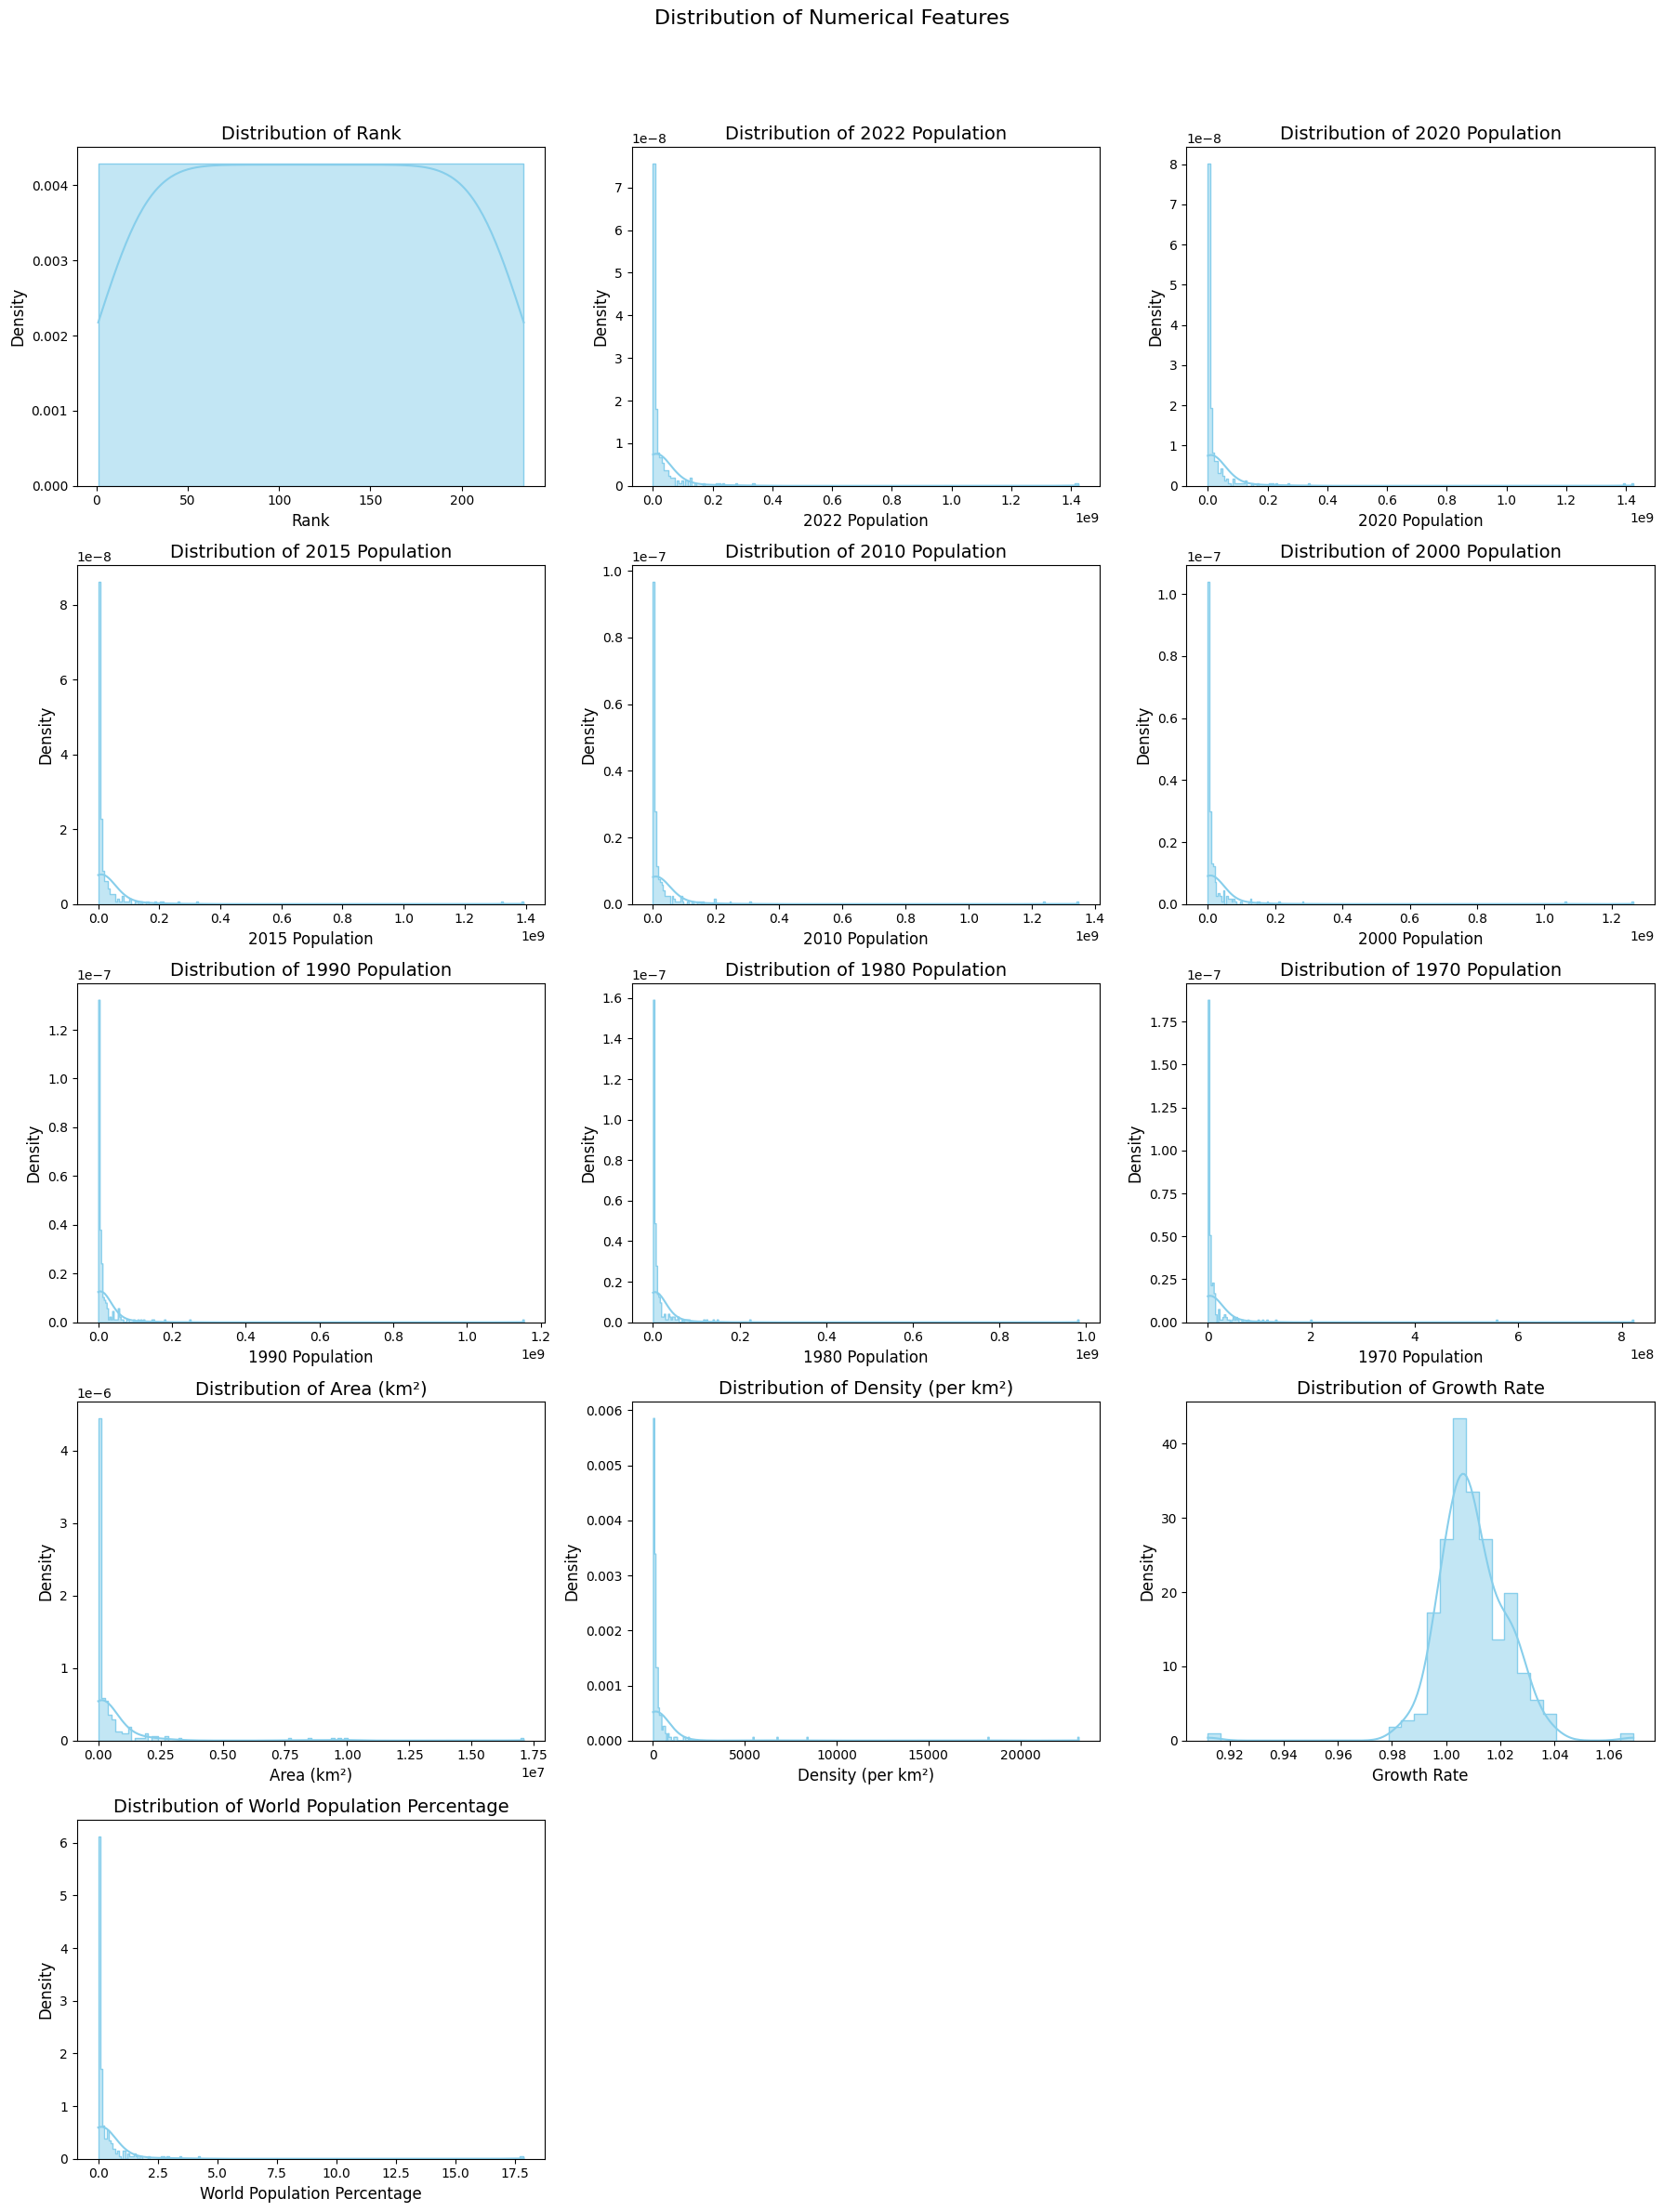

In [14]:
def visualize_numerical_distributions(df, exclude_columns='id'):

    # Set up the figure for multiple subplots
    num_cols = 3  # Number of columns for the subplot grid
    num_rows = (len(numeric_cols) + num_cols - 1) // num_cols  # Calculate number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
    fig.suptitle('Distribution of Numerical Features', fontsize=16)

    # Flatten axes array for easy iteration
    axes = axes.flatten()

    # Iterate over each numerical column and create a histogram with KDE
    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col], kde=True, ax=axes[i], color="skyblue", element="step", stat="density")
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Density', fontsize=12)

    # Remove unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the main title space
    plt.show()


visualize_numerical_distributions(df)

In [15]:
df["Growth Rate"].skew()

-1.1093363081747987

In [16]:
from scipy import stats

def robust_skewness_handler(df, threshold=2.0):
    transformed_df = df.copy()
    transformation_dict = {}

    for col in df.select_dtypes(include=[np.number]).columns:
        data = df[col].dropna()
        skewness = data.skew()

        if abs(skewness) > threshold:
            print(f"Handling skewness for {col} (skewness: {skewness:.2f})")

            # Handle zero-inflated or near-zero-inflated data
            if (data == 0).sum() / len(data) > 0.1:  # If more than 10% zeros
                non_zero = data[data != 0]
                if len(non_zero) > 0:
                    log_transform = np.log1p(non_zero)
                    transformed_df.loc[data != 0, col] = log_transform
                    transformation_dict[col] = ('log1p', 'zero-inflated')
                    print(f"  Applied Log1p to non-zero values for {col}")
                continue

            # Try Box-Cox transformation
            min_val = data.min()
            if min_val <= 0:
                shift = abs(min_val) + 1
                shifted_data = data + shift
            else:
                shifted_data = data

            try:
                transformed_data, lambda_param = stats.boxcox(shifted_data)
                transformed_df[col] = transformed_data
                transformation_dict[col] = ('box-cox', lambda_param)
                print(f"  Applied Box-Cox to {col} (lambda: {lambda_param:.2f})")
            except:
                # If Box-Cox fails, try other transformations
                if skewness > 0:  # Right-skewed
                    if data.max() / data.min() > 1000:  # Very large range
                        transformed_df[col] = np.log1p(data)
                        transformation_dict[col] = ('log1p', None)
                        print(f"  Applied Log1p to {col}")
                    else:
                        transformed_df[col] = np.sqrt(data)
                        transformation_dict[col] = ('sqrt', None)
                        print(f"  Applied Square Root to {col}")
                else:  # Left-skewed
                    transformed_df[col] = data ** 2
                    transformation_dict[col] = ('square', None)
                    print(f"  Applied Square to {col}")

    return transformed_df, transformation_dict

# Example usage:
transformed_df, transformations = robust_skewness_handler(df)

Handling skewness for 2022 Population (skewness: 9.07)
  Applied Log1p to 2022 Population
Handling skewness for 2020 Population (skewness: 9.16)
  Applied Log1p to 2020 Population
Handling skewness for 2015 Population (skewness: 9.16)
  Applied Log1p to 2015 Population
Handling skewness for 2010 Population (skewness: 9.15)
  Applied Log1p to 2010 Population
Handling skewness for 2000 Population (skewness: 9.28)
  Applied Log1p to 2000 Population
Handling skewness for 1990 Population (skewness: 12.21)
  Applied Log1p to 1990 Population
Handling skewness for 1980 Population (skewness: 12.18)
  Applied Log1p to 1980 Population
Handling skewness for 1970 Population (skewness: 9.57)
  Applied Log1p to 1970 Population
Handling skewness for Area (km²) (skewness: 6.06)
  Applied Log1p to Area (km²)
Handling skewness for Density (per km²) (skewness: 8.87)
  Applied Log1p to Density (per km²)
Handling skewness for World Population Percentage (skewness: 9.15)
  Applied Log1p to non-zero values fo

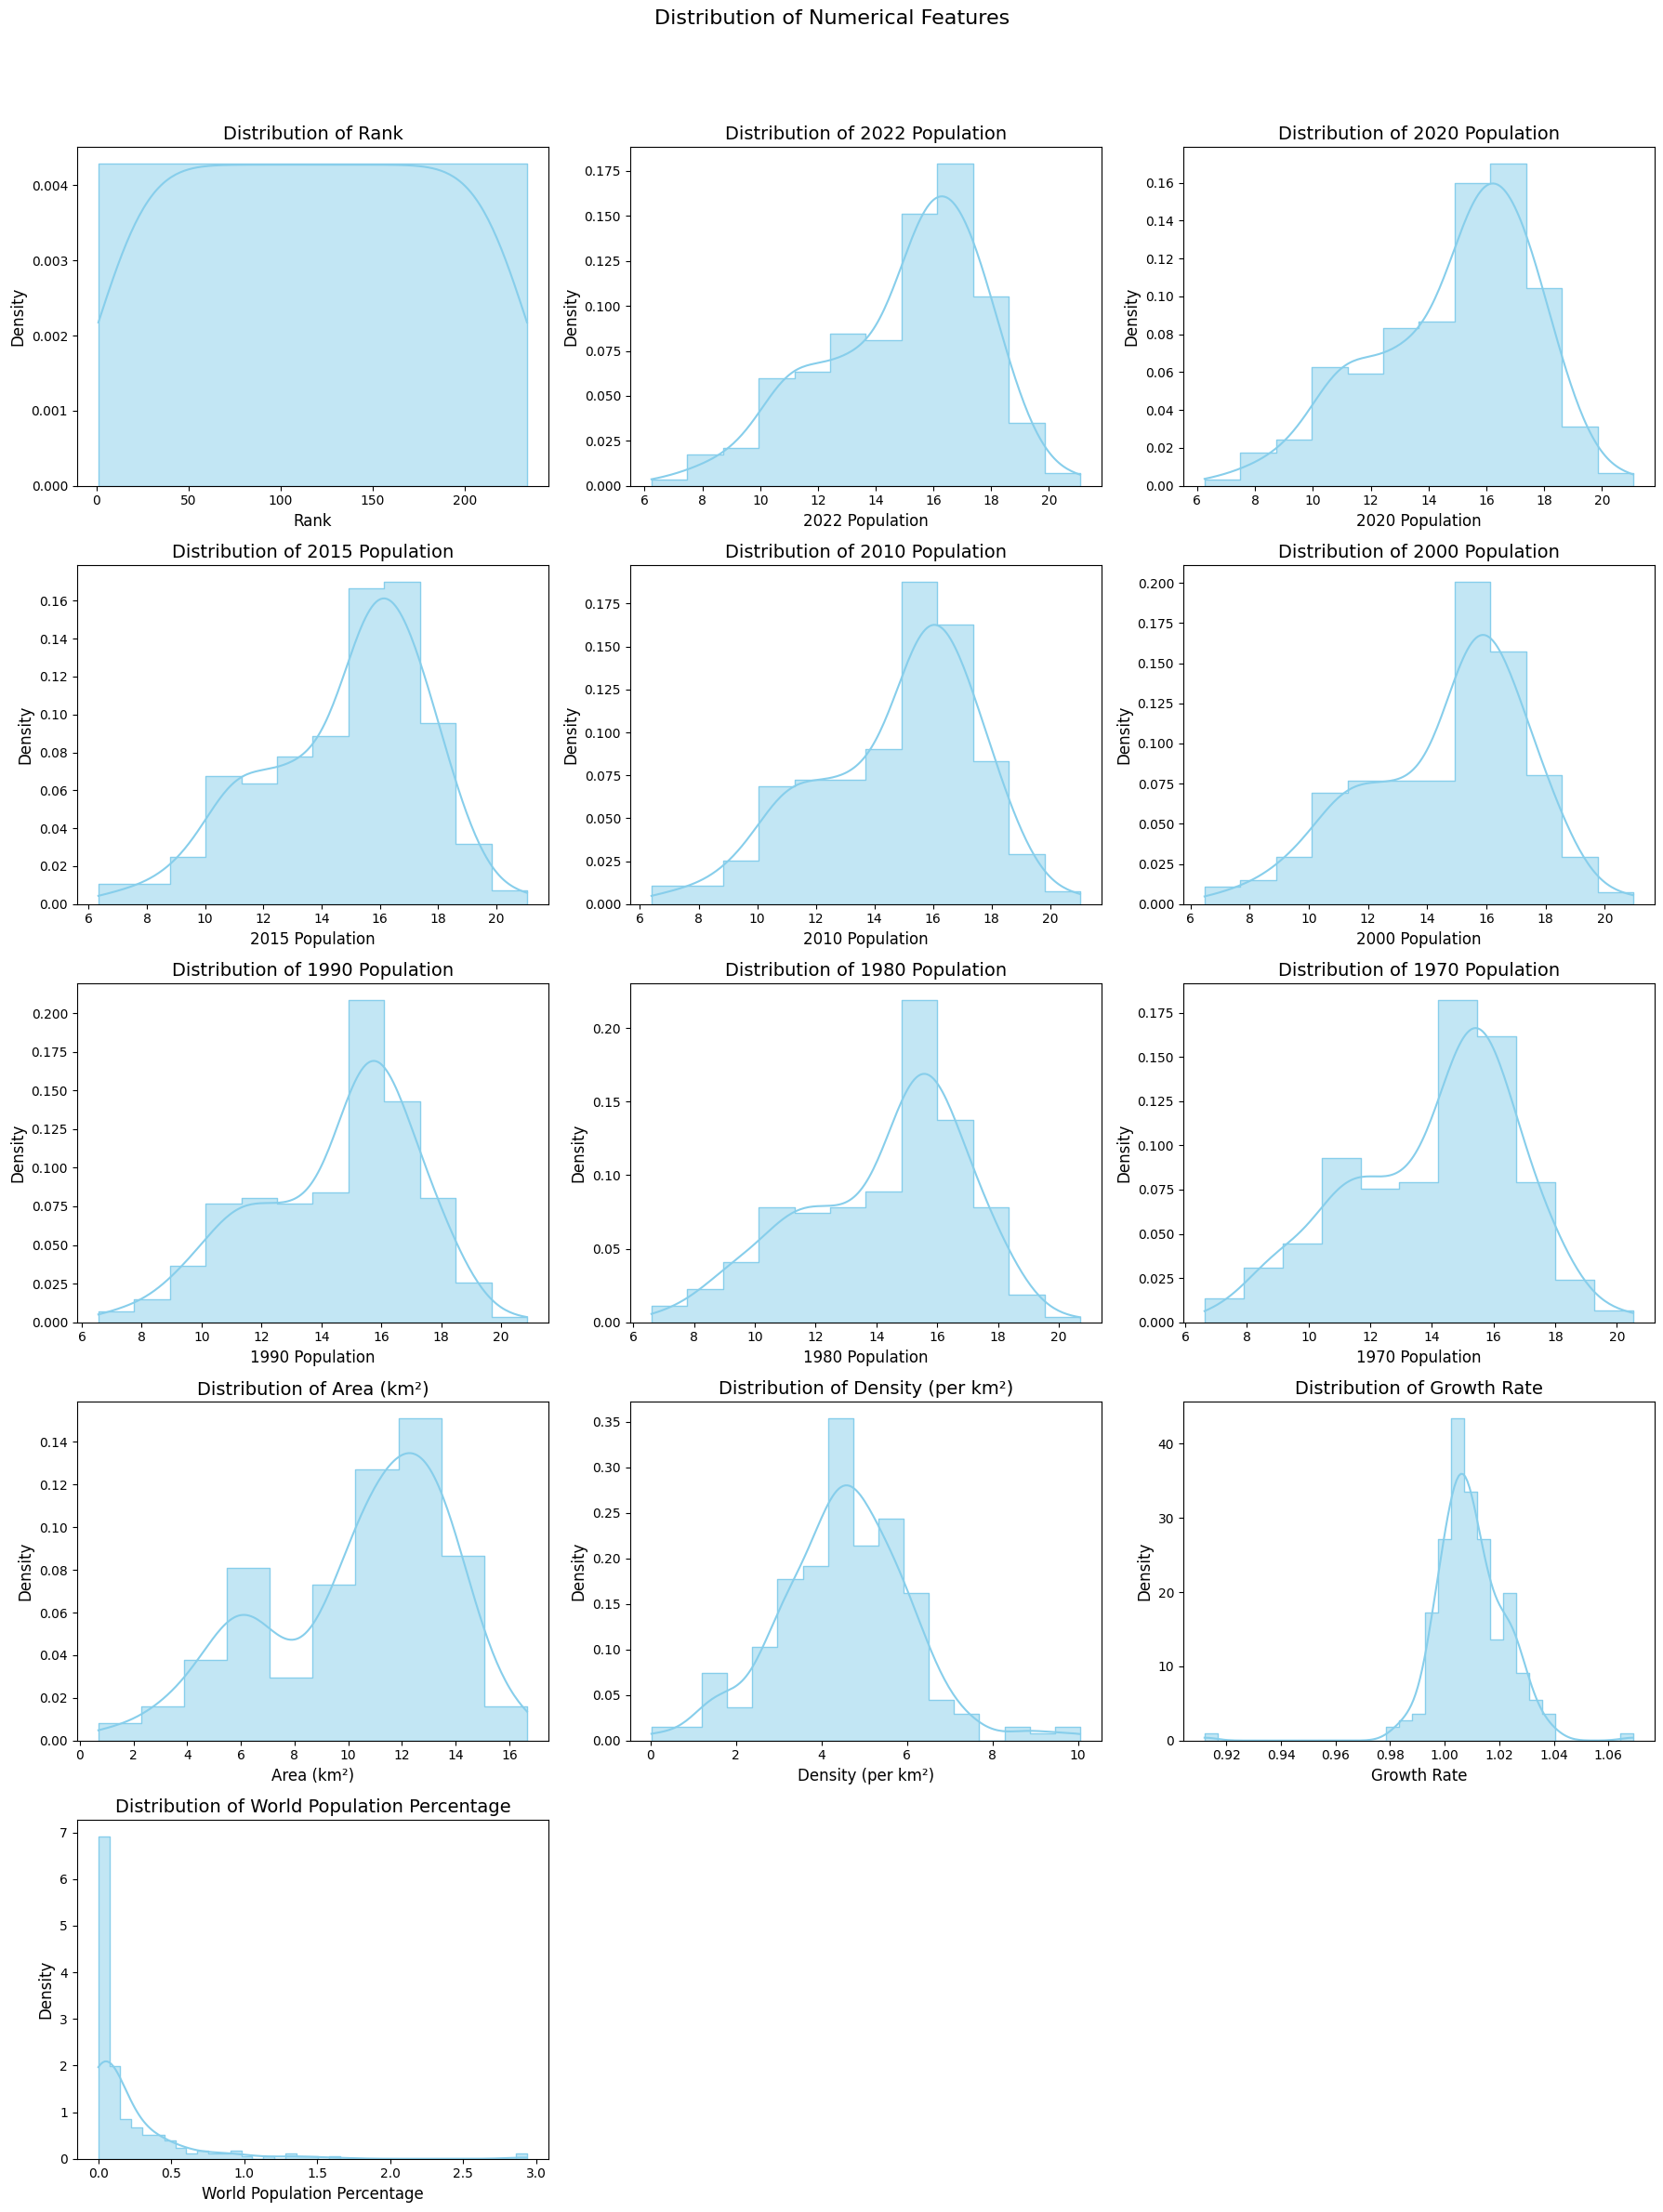

In [17]:
visualize_numerical_distributions(transformed_df)

## Outlier handling

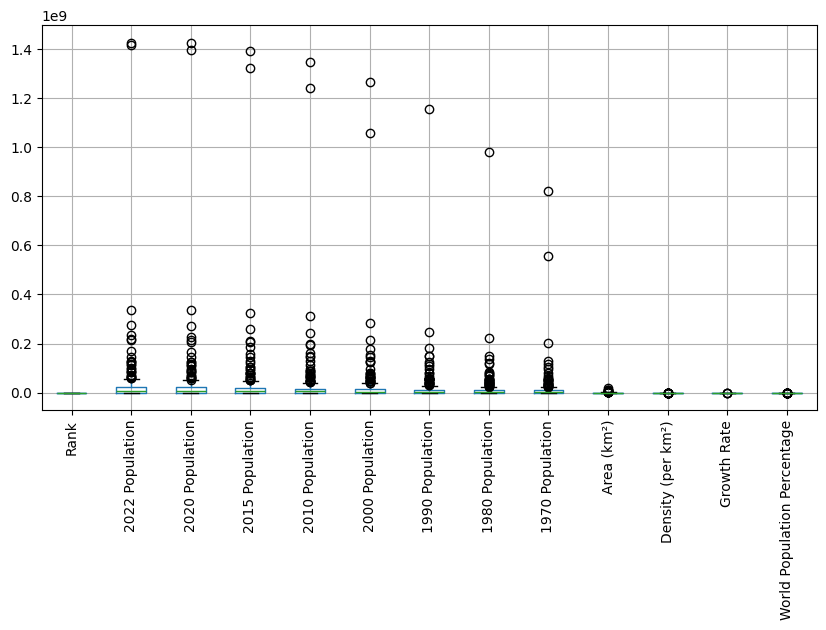

In [18]:
plt.figure(figsize=(10,5))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [19]:
def calculate_outliers_percentage(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

    # Print the percentage of outliers for each column
    for column in outlier_counts:
        percentage = (outlier_counts[column] / len(df)) * 100
        print(f"Percentage of outliers in {column}: {percentage:.2f}%")

# Example usage:
calculate_outliers_percentage(df)

Percentage of outliers in Rank: 0.00%
Percentage of outliers in 2022 Population: 10.68%
Percentage of outliers in 2020 Population: 11.11%
Percentage of outliers in 2015 Population: 11.54%
Percentage of outliers in 2010 Population: 12.82%
Percentage of outliers in 2000 Population: 12.39%
Percentage of outliers in 1990 Population: 12.82%
Percentage of outliers in 1980 Population: 13.25%
Percentage of outliers in 1970 Population: 11.97%
Percentage of outliers in Area (km²): 11.97%
Percentage of outliers in Density (per km²): 9.40%
Percentage of outliers in Growth Rate: 1.28%
Percentage of outliers in World Population Percentage: 10.68%


In [20]:
def handle_outliers(df):
    for column in numeric_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Capping
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

# Apply to both training and test datasets
df = handle_outliers(df)

In [21]:
calculate_outliers_percentage(df)

Percentage of outliers in Rank: 0.00%
Percentage of outliers in 2022 Population: 0.00%
Percentage of outliers in 2020 Population: 0.00%
Percentage of outliers in 2015 Population: 0.00%
Percentage of outliers in 2010 Population: 0.00%
Percentage of outliers in 2000 Population: 0.00%
Percentage of outliers in 1990 Population: 0.00%
Percentage of outliers in 1980 Population: 0.00%
Percentage of outliers in 1970 Population: 0.00%
Percentage of outliers in Area (km²): 0.00%
Percentage of outliers in Density (per km²): 0.00%
Percentage of outliers in Growth Rate: 0.00%
Percentage of outliers in World Population Percentage: 0.00%


In [22]:
# Group by 'Continent' and aggregate population data
population_agg = df.groupby('Continent')['2022 Population'].agg(['sum', 'mean', 'median', 'std']).reset_index()

# Rename columns for clarity
population_agg.columns = ['Continent', 'Total Population', 'Mean Population', 'Median Population', 'Population Std Dev']

# Display the aggregated table
population_agg.sort_values(by='Total Population', ascending=False)

,Continent,Total Population,Mean Population,Median Population,Population Std Dev
1,Asia,1.227234e+09,2.504559e+07,19397998.0,2.167730e+07
0,Africa,1.084244e+09,1.936151e+07,13564781.0,1.888180e+07
2,Europe,5.984805e+08,1.221389e+07,5023109.0,1.808668e+07
5,South America,2.775078e+08,1.982199e+07,15112555.0,2.014339e+07
3,North America,2.465115e+08,6.162788e+06,236399.0,1.358952e+07
4,Oceania,4.502050e+07,2.046386e+06,122698.0,5.874435e+06


### Filter data

In [23]:
df.columns

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

In [24]:
# loc --> row and column filtering

df.loc[(df['2022 Population']>2e8) & (df['Area (km²)']>5e6), ['Country', '2022 Population']].sort_values(by='2022 Population',
                                                                              ascending=False)

,Country,2022 Population


In [25]:
# iloc --> row and column filtering
df.iloc[1:5, 5:7]

,2022 Population,2020 Population
1,2842321.0,2866849.0
2,44903225.0,43451666.0
3,44273.0,46189.0
4,79824.0,77700.0


In [26]:
df.query('Continent=="Asia"')

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.00,38972230.0,3.375350e+07,28189672.0,19542982.0,10694796.0,12486631.0,10752971.00,652230.00,63.058700,1.0257,0.520
9,140,ARM,Armenia,Yerevan,Asia,2780469.00,2805608.0,2.878595e+06,2946293.0,3168523.0,3556539.0,3135123.0,2534377.00,29743.00,93.483100,0.9962,0.030
13,91,AZE,Azerbaijan,Baku,Asia,10358074.00,NaN,9.863480e+06,9237202.0,8190337.0,7427836.0,6383060.0,5425317.00,86600.00,119.608200,1.0044,0.130
15,154,BHR,Bahrain,Manama,Asia,1472233.00,1477469.0,1.362142e+06,1213645.0,711442.0,517418.0,362595.0,222555.00,765.00,537.312813,1.0061,0.020
16,8,BGD,Bangladesh,Dhaka,Asia,56004689.75,53196858.5,4.873569e+07,41490541.5,38569462.5,29314013.0,24207514.5,21824501.75,147570.00,537.312813,1.0108,0.685
23,165,BTN,Bhutan,Thimphu,Asia,782455.00,772506.0,7.432740e+05,705516.0,587207.0,558442.0,415257.0,298894.00,38394.00,20.379600,1.0064,0.010
29,175,BRN,Brunei,Bandar Seri Begawan,Asia,449002.00,441725.0,4.214370e+05,396053.0,333926.0,261928.0,187921.0,133343.00,5765.00,77.884100,1.0081,0.010
33,73,KHM,Cambodia,Phnom Penh,Asia,16767842.00,16396860.0,1.541752e+07,14363532.0,12118841.0,8910808.0,6198959.0,6708525.00,181035.00,92.622100,1.0108,0.210
41,1,CHN,China,Beijing,Asia,56004689.75,53196858.5,4.873569e+07,41490541.5,38569462.5,29314013.0,24207514.5,21824501.75,1032757.25,146.893300,1.0000,0.685
73,131,GEO,Georgia,Tbilisi,Asia,3744385.00,3765912.0,3.771132e+06,NaN,NaN,NaN,NaN,NaN,69700.00,53.721400,0.9964,0.050


In [27]:
# Boolean Conditions
df[(df['Continent'] == 'Asia') & (df['2022 Population']<df['2020 Population'])]

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
9,140,ARM,Armenia,Yerevan,Asia,2780469.0,2805608.0,2.878595e+06,2946293.0,3168523.0,3556539.0,3135123.0,2534377.00,29743.0,93.483100,0.9962,0.03
15,154,BHR,Bahrain,Manama,Asia,1472233.0,1477469.0,1.362142e+06,1213645.0,711442.0,517418.0,362595.0,222555.00,765.0,537.312813,1.0061,0.02
73,131,GEO,Georgia,Tbilisi,Asia,3744385.0,3765912.0,3.771132e+06,NaN,NaN,NaN,NaN,NaN,69700.0,53.721400,0.9964,0.05
89,104,HKG,Hong Kong,Hong Kong,Asia,7488865.0,7500958.0,7.399838e+06,7132438.0,6731195.0,5838574.0,4978544.0,3955072.00,1104.0,537.312813,0.9992,0.09
108,129,KWT,Kuwait,Kuwait City,Asia,4268873.0,4360444.0,3.908743e+06,2943356.0,1934901.0,1674938.0,1493870.0,802786.00,17818.0,239.582100,1.0044,0.05
112,119,LBN,Lebanon,Beirut,Asia,5489739.0,5662923.0,6.398940e+06,4995800.0,4320642.0,3593700.0,2963702.0,2381791.00,10452.0,525.233400,0.9816,0.07
167,143,QAT,Qatar,Doha,Asia,2695122.0,2760385.0,2.414573e+06,1713504.0,645937.0,441675.0,277450.0,118007.00,11586.0,232.618900,1.0026,0.03
194,29,KOR,South Korea,Seoul,Asia,51815810.0,51844690.0,4.873569e+07,41490541.5,38569462.5,29314013.0,24207514.5,21824501.75,100210.0,517.072200,0.9997,0.65


In [28]:
## isin function
df[df['Continent'].isin(['Asia', 'Europe'])]

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.00,38972230.0,3.375350e+07,28189672.0,19542982.0,10694796.0,12486631.0,10752971.00,652230.0,63.0587,1.0257,0.520
1,138,ALB,Albania,Tirana,Europe,2842321.00,2866849.0,2.882481e+06,2913399.0,3182021.0,3295066.0,2941651.0,2324731.00,28748.0,98.8702,0.9957,0.040
4,203,AND,Andorra,Andorra la Vella,Europe,79824.00,77700.0,7.174600e+04,71519.0,66097.0,53569.0,35611.0,19860.00,468.0,170.5641,1.0100,0.000
9,140,ARM,Armenia,Yerevan,Asia,2780469.00,2805608.0,2.878595e+06,2946293.0,3168523.0,3556539.0,3135123.0,2534377.00,29743.0,93.4831,0.9962,0.030
12,99,AUT,Austria,Vienna,Europe,8939617.00,8907777.0,8.642421e+06,8362829.0,8010428.0,7678729.0,7547561.0,7465301.00,83871.0,106.5877,1.0020,0.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,21,GBR,United Kingdom,London,Europe,56004689.75,53196858.5,4.873569e+07,41490541.5,38569462.5,29314013.0,24207514.5,21824501.75,242900.0,277.9289,1.0034,0.685
224,43,UZB,Uzbekistan,Tashkent,Asia,34627652.00,33526656.0,3.094942e+07,28614227.0,24925554.0,20579100.0,15947129.0,12011361.00,447400.0,77.3975,1.0160,0.430
226,234,VAT,Vatican City,Vatican City,Europe,510.00,520.0,5.640000e+02,596.0,651.0,700.0,733.0,752.00,1.0,510.0000,0.9980,0.000
228,16,VNM,Vietnam,Hanoi,Asia,56004689.75,53196858.5,4.873569e+07,41490541.5,38569462.5,29314013.0,24207514.5,21824501.75,331212.0,296.4472,1.0074,0.685


In [29]:
## filter
df.filter(like='Population')

,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,World Population Percentage
0,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,0.52
1,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,0.04
2,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,0.56
3,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,0.00
4,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,0.00
...,...,...,...,...,...,...,...,...,...
229,11572.0,11655.0,12182.0,13142.0,14723.0,13454.0,11315.0,9377.0,0.00
230,575986.0,556048.0,491824.0,413296.0,270375.0,178529.0,116775.0,76371.0,0.01
231,33696614.0,32284046.0,28516545.0,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,0.42
232,20017675.0,18927715.0,NaN,13792086.0,9891136.0,7686401.0,5720438.0,4281671.0,0.25
